In [1]:
import feedparser
from pprint import pprint

import config

from tqdm import tqdm

In [2]:
links = list((config.rss_links).values())

In [3]:
# def process_posts_alt(newsfeed_obj):
#     return [post for post in newsfeed_obj.entries]

def process_posts(newsfeed_obj):
    for post in newsfeed_obj.entries:
        posts_dict = {}
        posts_dict['title'] = post.title
        posts_dict['link'] = post.link
#         posts_dict['summary_detail'] = post.summary
        posts_dict['published'] = post.published
        try:
            posts_dict['author'] = post.authors
        except:
            pass
        postmaster.append(posts_dict)

In [4]:
# extract rss feeds and push to a list

postmaster = []

for link in tqdm(links):
#     print(link)
    entries_list = process_posts(feedparser.parse(link))
    postmaster.append(entries_list)

100%|██████████| 19/19 [00:40<00:00,  2.12s/it]


In [5]:
# clean NoneType entries
postmaster = [posts for posts in postmaster if posts is not None]

In [6]:
# get titles
titles_list = list(set([post['title'] for post in postmaster]))

In [7]:
len(titles_list)

1452

In [8]:
titles_list[:20]

['472 Maoist surrendered this year, highest in 3 years: Govt',
 'No Covid checks for migrants, rural Jharkhand braces for worst',
 'Transpersons appeal for special vaccination drive',
 'Vaccination centre in NCR turns away people despite slot confirmation message',
 "2 Covid care centres built in Rajasthan's Barmer district within 48 hours",
 'Gianluigi Buffon to leave Juventus at end of season but postpones call on retirement',
 'Covid-19 Vaccination: In A First, More Second Doses Administered Than First Jabs In May',
 "After Pragya Thakur, Madhya Pradesh BJP MLA Calls Nathuram Godse 'Nationalist'",
 'Chinese loan app case: ED attaches ₹76.67 crore',
 'Maratha reservation: CM Thackeray leads delegation to Raj Bhavan, to seek audience with PM Modi',
 "Broker's call: Avenue Supermarts (Buy)",
 'Olympics 2020: Japan’s Naomi Osaka unsure if Tokyo Games should happen in the middle of the pandemic',
 "10-day full lockdown in Telangana from May 12 - What's allowed, what's not",
 '14k new cas

In [ ]:
# EXPERIMENT #1
#  Word embedding -> dim reduction -> clustering 
#  embedding: sentence-transformer: model distilroberta
#  dimensionality reduction: UMAP
#  clustering: HDBScan

# 

# NOTES:
#     most 'advanced' methodology at the time for topic clustering
#     results: topical clustering is good. can be better with hyperparam finetuning
#     however, not suitable for my use case of finding equivalent news titles
#         will be useful for recommendation of related articles, but that is a later stage feature

In [9]:
# sentence embeddings

In [10]:
from sentence_transformers import SentenceTransformer

In [11]:
model = SentenceTransformer('stsb-distilroberta-base-v2')

In [12]:
embeddings = model.encode(titles_list, show_progress_bar=True)

In [13]:
# dimensionality reduction

In [14]:
import umap

In [15]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [16]:
# cluster

In [17]:
import numpy

In [18]:
# HDBScan throws an error for numpy versions < 1.20
# upgraded numpy for this. 
# most likely that tensorflow will start crying because of this
#    threw a warning during numpy upgrade; yet to test

numpy.__version__

'1.20.3'

In [20]:
import hdbscan

In [21]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

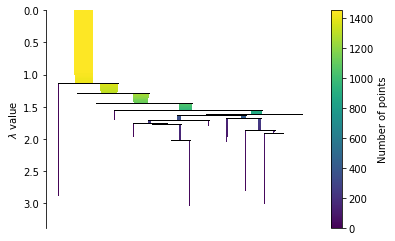

In [22]:
cluster.condensed_tree_.plot()

In [24]:
len(cluster.labels_)

1452

In [50]:
unique_labels = set(cluster.labels_)

In [51]:
uniques_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [34]:
len(titles_list)

1452

In [ ]:
import pandas as pd

In [35]:
cluster_data = pd.DataFrame({'titles': titles_list, 'cluster_labels': cluster.labels_})

In [38]:
cluster_data

,titles,cluster_labels
0,"472 Maoist surrendered this year, highest in 3...",-1
1,"No Covid checks for migrants, rural Jharkhand ...",-1
2,Transpersons appeal for special vaccination drive,-1
3,Vaccination centre in NCR turns away people de...,-1
4,2 Covid care centres built in Rajasthan's Barm...,-1
...,...,...
1447,Don't stop ambulances at borders: Telangana HC,-1
1448,Parties get bonds worth Rs 695 crore for stat...,-1
1449,Man United lose to Leicester to hand Premier L...,-1
1450,Govt likely to drop plan to decriminalise cheq...,6


In [47]:
pd.set_option('display.max_colwidth', None)

In [52]:
cluster_data.loc[cluster_data['cluster_labels'] == -1]

,titles,cluster_labels
0,"472 Maoist surrendered this year, highest in 3 years: Govt",-1
1,"No Covid checks for migrants, rural Jharkhand braces for worst",-1
2,Transpersons appeal for special vaccination drive,-1
3,Vaccination centre in NCR turns away people despite slot confirmation message,-1
4,2 Covid care centres built in Rajasthan's Barmer district within 48 hours,-1
...,...,...
1444,NYSE-listed Startek prunes net loss to $12.2 million in first quarter,-1
1445,Gold Mutual Fund vs Gold ETF: Which is a better investment option for you?,-1
1447,Don't stop ambulances at borders: Telangana HC,-1
1448,Parties get bonds worth Rs 695 crore for state polls,-1


In [48]:
cluster_data.loc[cluster_data['cluster_labels'] == 0]

,titles,cluster_labels
101,UP: Case Registered Against 35 SP Leaders for Violating Covid Norms in Unnao,0
256,Indian among two women killed in Gaza in rocket attacks on Israel,0
260,Gaza attack: Kerala woman victim’s family shocked,0
294,"Over 1,000 Rockets Fired From Gaza Towards Israel Since Monday: Army",0
313,Israel closes Tel Aviv airport after rocket fire from Gaza,0
386,Indian woman in Israel killed in rocket attack by Palestinian militants from Gaza,0
394,Centre confirms death of Kerala woman in a rocket attack on Israel,0
460,"Israel, Hamas escalate fighting; no end in sight",0
499,Deadly night of violence between Israel & Palestinian militants,0
592,Violence in Israel challenges Biden’s ‘stand back’ approach,0


In [49]:
cluster_data.loc[cluster_data['cluster_labels'] == 1]

,titles,cluster_labels
20,First batch of women military police inducted into Indian Army,1
33,Delhi University offers 41 Asst Professor posts at Acharya Nanda Dev college; here’s how to apply,1
62,Conduct evaluation for those who have not written Class 10 pre-board exams: Delhi govt to schools,1
83,"GATE 2021 AIR 8 (electrical) shares preparation strategy, books to follow and his dream job",1
103,"Uttarakhand, UKPSC, Personal Assistant Exam Answer Key Out",1
116,"Amid COVID Surge, UP Govt Postpones UPTET 2021",1
212,"Horoscope Today, 11 May 2021: Check Out Daily Astrological Prediction for Cancer, Leo, Virgo, Libra, Scorpio and Other Signs",1
224,"Day Trading Guide for May 12, 2021",1
348,Work That Speaks | Ad Reviews | 3 To 11 May 2021,1
359,"Telangana SSC Results 2021: All Class 10 students pass, grades based on internal assessment",1


In [53]:
cluster_data.loc[cluster_data['cluster_labels'] == 2]

,titles,cluster_labels
5,Gianluigi Buffon to leave Juventus at end of season but postpones call on retirement,2
55,Shikhar Dhawan Could Captain India in Sri Lanka White-Ball Series,2
146,Thomas Tuchel relishing Chelsea run-in with two trophies up for grabs,2
148,New Zealand wicket-keeper B J Watling to retire after WTC final,2
162,Pep does it again: Reactions to Manchester City’s incredible Premier League title run,2
456,Explained: Why Tom Cruise returned his three Golden Globe awards,2
482,New Zealand wicket-keeper BJ Watling to retire after WTC final against India,2
536,This Was The Hardest: Guardiola on City’s 5th Premier League Title,2
543,Tom Cruise's Latest Mission Impossibe Has A Kashmir Connection,2
562,How the Golden Globes went from laughingstock to power player,2


In [54]:
cluster_data.loc[cluster_data['cluster_labels'] == 3]

,titles,cluster_labels
10,Broker's call: Avenue Supermarts (Buy),3
77,"Iron ore prices surge as global economy rebounds, Covid-19 pandemic recedes",3
120,Drawing foreign investors,3
225,"Punjab sees record wheat procurement in over a decade, may breach its own purchase target for the year",3
265,"MARKET LIVE: Sensex dips 450 points; financials, IT stocks slip",3
270,L&T's Q4 revenue expected to grow on the back of higher execution,3
287,"Siemens surges 10%, hits new high on strong March quarter results",3
352,Rupee falls 17 paise to 73.51 against US dollar in early trade,3
397,Wall Street closes lower as inflation jitters spark broad sell-off,3
405,"Sensex tanks over 400 pts in early trade; Nifty drops below 14,750",3


In [55]:
cluster_data.loc[cluster_data['cluster_labels'] == 7]

,titles,cluster_labels
37,"Kerala RS polls: After Govt nudge, EC broke 25-yr tradition until HC stepped in",7
52,"Never sought 5-star Covid facility, says Delhi High Court",7
57,"District Kasganj, UP: ‘Politicians should be among us, but never descend from photographs’",7
70,"Bias in oxygen supply, says Delhi; HC tells Centre can’t duck this",7
82,"A remarkable life in law, tireless champion of civil liberties, press freedom, humanity",7
179,Election Commission panel counsel in Supreme Court resigns,7
239,"Supply oxygen allotted to Delhi or face contempt, HC warns Centre",7
240,State encouraged people to flout norms: Delhi HC,7
241,"SC rejects plea against Karnataka HC order, ‘won’t leave people in the lurch’",7
243,Daily wagers struggling as govt. broke word on free ration: Delhi Congress,7


In [56]:
cluster_data.loc[cluster_data['cluster_labels'] == 10]

,titles,cluster_labels
14,Noida Development Authority to provide oxygen cylinders and refilling to COVID-19 patients in home isolation,10
17,"World chips in: French oxygen plant at Apollo, US oximeters in Safdarjung",10
22,"Pune, health briefs: Hyundai hands over high flow nasal oxygen machines; NephroPlus launches `Dialysis on Wheels’",10
47,"Rs 700-Rs 1,500: Amid lack of clarity, what private hospitals are charging",10
71,"April, November last year: Officials, House panel flagged oxygen need, shortage",10
...,...,...
1382,26 Covid Patients Die At Goa Govt Hospital,10
1384,India fights Covid: Lancet lauds Odisha’s efforts in sending oxygen to states,10
1392,TIMS officials deny allegations of oxygen shortage snuffing out 8 lives,10
1438,Top five states in active cases get lower share of oxygen: Government data,10


In [ ]:
for postslist in postmaster:
    if postslist:
        print([key for key in postslist[0].keys()])

In [ ]:
source_list = ['TOI India',
'TOI Most Recent Stories',
'TOI World',
'NDTV',
'India Today',
'The Indian Express General Feed',
'The Indian Express Front Page Feed',
'The Hindu National Feed',
'The Hindu Default feed',
'News18',
'Business Standard',
'DNA India',
'Deccan Chronicle',
'Scroll',
'Financial Express',
'The Hindu Business Line',
'Free Press Journal',
'Outlook India',
'The Quint']

links_list = ['http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms',
'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms',
'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms',
'http://feeds.feedburner.com/NDTV-LatestNews',
'https://www.indiatoday.in/rss/1206578',
'https://indianexpress.com/feed/',
'https://indianexpress.com/print/front-page/feed/',
'https://www.thehindu.com/news/national/?service=rss',
'https://www.thehindu.com/news/feeder/default.rss',
'http://www.news18.com/rss/india.xml',
'https://www.business-standard.com/rss/latest.rss',
'https://www.dnaindia.com/feeds/india.xml',
'https://www.deccanchronicle.com/rss_feed/',
'http://feeds.feedburner.com/ScrollinArticles.rss',
'http://www.financialexpress.com/feed',
'https://www.thehindubusinessline.com/?service=rss',
'https://prod-qt-images.s3.amazonaws.com/production/freepressjournal/feed.xml',
'http://www.outlookindia.com/rss/home',
'https://prod-qt-images.s3.amazonaws.com/production/thequint/feed.xml']

sources = dict(zip(source_list, links_list))

In [ ]:
sources

In [ ]:
# check rss feed links

links_to_check = ['http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms',
'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms',
'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms',
'http://feeds.feedburner.com/NDTV-LatestNews',
'https://www.indiatoday.in/rss/1206578',
'https://indianexpress.com/feed/',
'https://indianexpress.com/print/front-page/feed/',
'https://www.thehindu.com/news/national/?service=rss',
'https://www.thehindu.com/news/feeder/default.rss',
'http://www.news18.com/rss/india.xml',
'https://www.business-standard.com/rss/latest.rss',
'https://www.dnaindia.com/feeds/india.xml',
'https://www.deccanchronicle.com/rss_feed/',
'http://feeds.feedburner.com/ScrollinArticles.rss',
'http://www.financialexpress.com/feed',
'https://www.thehindubusinessline.com/?service=rss',
'https://prod-qt-images.s3.amazonaws.com/production/freepressjournal/feed.xml',
'http://www.outlookindia.com/rss/home',
'https://prod-qt-images.s3.amazonaws.com/production/thequint/feed.xml']

def check_feed(link):
    print(link)
    print(len(feedparser.parse(link).entries))
    print('------------------------')
    
for link in links_to_check:
    check_feed(link)
    

In [ ]:
sources = dict(zip(source_list, links_list))

In [ ]:
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms' 15 india
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms' 19 most recent stories
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms' 20 world
toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms'
len(feedparser.parse(toi_link).entries)

In [ ]:
len(feedparser.parse('https://www.thehindu.com/news/feeder/default.rss').entries)

In [ ]:
ie_link = 'https://indianexpress.com/print/front-page/feed/'
feedparser.parse(ie_link)

In [ ]:
len(feedparser.parse(ie_link).entries)

In [ ]:
ie_link_generic = 'https://indianexpress.com/feed/'
feedparser.parse(ie_link_generic)

In [ ]:
# NewsFeed = feedparser.parse('https://www.thehindu.com/news/feeder/default.rss')
NewsFeed

In [ ]:
NewsFeed.entries[0]

In [ ]:
postmaster = []

for post in NewsFeed.entries:
    posts_dict = {}
    print(post.title)
    posts_dict['title'] = post.title
    posts_dict['authors'] = post.authors
    posts_dict['link'] = post.link
    posts_dict['summary'] = post.summary
    posts_dict['published'] = post.published
    
    postmaster.append(posts_dict)
    print('----------------------')
    

In [ ]:
pprint(postmaster[:5])

In [ ]:
len(postmaster)

# Sca